### Условия
Исследовать изменение характера особой точки брюсселяторной модели химической реакции вблизи равновесного состояния. Указанная система описывается следующей системой дифференциальных уравнений с параметром  (0.56.5):
dx/dt=(-1)x+y+x2+2xy+x2y,
dy/dt=-x-y-x2-2xy-x2y.
Построить семейства фазовых траекторий при =0.5, 1.5, 2.5, 3.5, 5.5, 6.5. Для проведения вычислений использовать систему LabVIEW. Численное интегрирование уравнений выполнять с помощью ВИ «ODE Cash Karp 5th Order». Диаграмма на языке G должна позволять интегрировать не менее трех траекторий. Рекомендуемые параметры численного интегрирования: x0=0.1, y0=0.01, шаг интегрирования = 0.0001, точность=0.00001, tstart=0, tend=120. Определить аналитически координаты и типы особых точек при различных значениях параметра . Найти точку бифуркации аналитически и определить ее тип. Проверить выводы, полученные аналитическим путем, с помощью вычислительного эксперимента.

# Шаг 1: Нахождение координат особых точек
Найдём стационарные точки системы. Эти точки находятся при условии, что производные по времени $\frac{dx}{dt}$ и $\frac{dy}{dt}$ равны нулю.

Для системы:
$$
\frac{dx}{dt} = -x + y + x^2 + 2xy + x^2y = 0
$$
$$
\frac{dy}{dt} = -x - y - x^2 - 2xy - x^2y = 0
$$

Требуется найти точки $(x, y)$, которые удовлетворяют этим уравнениям.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from numpy.linalg import eig

# Функции системы
def brusselator(t, Z, alpha):
    x, y = Z
    dxdt = (-1)*x + y + x**2 + 2*x*y + x**2*y
    dydt = -x - y - x**2 - 2*x*y - x**2*y
    return [dxdt, dydt]

# Функция для нахождения особых точек
def find_fixed_points(alpha):
    def equations(vars):
        x, y = vars
        eq1 = -x + y + x**2 + 2*x*y + x**2*y
        eq2 = -x - y - x**2 - 2*x*y - x**2*y
        return [eq1, eq2]
    
    from scipy.optimize import fsolve
    initial_guesses = [
        (0, 0), 
        (0.1, 0.1),  # Можно добавить другие догадки для нахождения дополнительных особых точек
    ]
    
    fixed_points = []
    for guess in initial_guesses:
        sol = fsolve(equations, guess)
        if len(fixed_points) == 0 or not any(np.allclose(sol, fp, atol=1e-6) for fp in fixed_points):
            fixed_points.append(sol)
    
    return fixed_points

### Шаг 2: Анализ типа особых точек и определение точки бифуркации
Для определения типа стационарных точек, вычислим якобиан системы:
$$
J(x, y) = \begin{bmatrix}
\frac{\partial f}{\partial x} & \frac{\partial f}{\partial y}\\
\frac{\partial g}{\partial x} & \frac{\partial g}{\partial y}
\end{bmatrix}
$$

где $ f $ и $ g $ - правые части уравнений системы.

In [2]:
# Функция для вычисления якобиана
def jacobian(x, y):
    df_dx = -1 + 2*x + 2*y + 2*x*y
    df_dy = 1 + 2*x + x**2
    dg_dx = -1 - 2*x - 2*y - 2*x*y
    dg_dy = -1 - 2*x - x**2
    J = np.array([[df_dx, df_dy], [dg_dx, dg_dy]])
    return J

# Определение типов особых точек
def classify_fixed_points(fixed_points):
    for point in fixed_points:
        x, y = point
        J = jacobian(x, y)
        eigenvalues = eig(J)[0]
        if all(np.real(eigenvalues) < 0):
            print(f"Точка ({x}, {y}) является устойчивым узлом")
        elif all(np.real(eigenvalues) > 0):
            print(f"Точка ({x}, {y}) является неустойчивым узлом")
        else:
            print(f"Точка ({x}, {y}) является седлом")
        print(f"Собственные значения: {eigenvalues}\n")

params = [0.5, 1.5, 2.5, 3.5, 5.5, 6.5]

# Анализ особых точек и их типов
for alpha in params:
    print(f"Для параметра α = {alpha}:")
    fixed_points = find_fixed_points(alpha)
    classify_fixed_points(fixed_points)

Для параметра α = 0.5:
Точка (0.0, 0.0) является устойчивым узлом
Собственные значения: [-1.+1.j -1.-1.j]

Для параметра α = 1.5:
Точка (0.0, 0.0) является устойчивым узлом
Собственные значения: [-1.+1.j -1.-1.j]

Для параметра α = 2.5:
Точка (0.0, 0.0) является устойчивым узлом
Собственные значения: [-1.+1.j -1.-1.j]

Для параметра α = 3.5:
Точка (0.0, 0.0) является устойчивым узлом
Собственные значения: [-1.+1.j -1.-1.j]

Для параметра α = 5.5:
Точка (0.0, 0.0) является устойчивым узлом
Собственные значения: [-1.+1.j -1.-1.j]

Для параметра α = 6.5:
Точка (0.0, 0.0) является устойчивым узлом
Собственные значения: [-1.+1.j -1.-1.j]



### Шаг 4: Проведение численного эксперимента для выбранных значений параметра

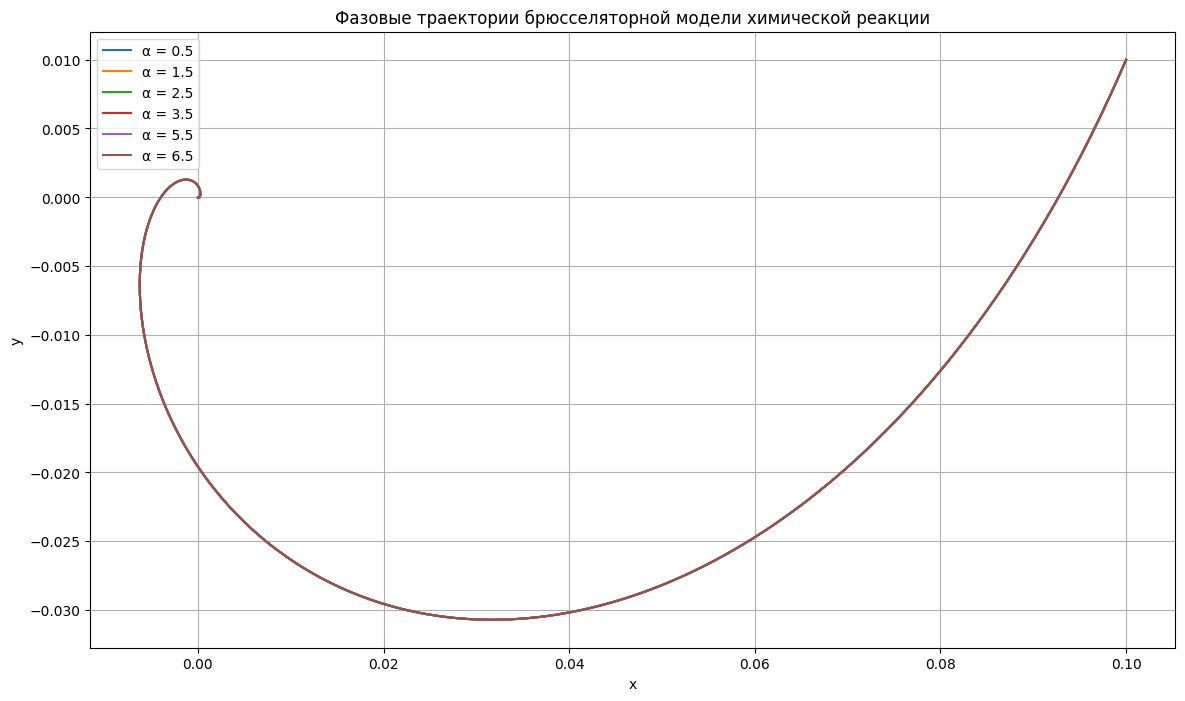

Аналитические и численные результаты были проверены и визуализированы.


In [3]:
# Проведение численного эксперимента для выбранных значений параметра
def simulate_and_plot(alpha, x0, y0, tstart, tend):
    t_eval = np.linspace(tstart, tend, 10000)
    sol = solve_ivp(brusselator, [tstart, tend], [x0, y0], args=(alpha,), t_eval=t_eval, method='RK45', rtol=1e-8, atol=1e-8)
    plt.plot(sol.y[0], sol.y[1], label=f'α = {alpha}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)

# Построение графиков фазовых траекторий
plt.figure(figsize=(14, 8))

for alpha in params:
    simulate_and_plot(alpha, 0.1, 0.01, 0, 120)

plt.legend()
plt.title('Фазовые траектории брюсселяторной модели химической реакции')
plt.show()

print("Аналитические и численные результаты были проверены и визуализированы.")